In [1]:
%%sh

echo "$ ls .."
ls .. | grep logs
echo "\n$ ls ../logs-valid-1500"
ls ../logs-valid-1500
echo "\n$ tail ../logs-valid-1500/logs6.txt"
tail ../logs-valid-1500/logs6.txt

$ ls ..
logs-backup
logs-backup-1000
logs-backup-400
logs-valid-1500
logs-valid-800
logs-valid-set2
logs6t.txt

$ ls ../logs-valid-1500
logs6.txt
model.pkl
model.txt
train_log_file.txt

$ tail ../logs-valid-1500/logs6.txt
[3020.86253] Tree 1498
[1499]	training's binary_logloss: 0.0293007	valid_1's binary_logloss: 0.365361
[3022.50602] Tree 1499
[1500]	training's binary_logloss: 0.0292967	valid_1's binary_logloss: 0.365353
[3024.12708] Tree 1500
Did not meet early stopping. Best iteration is:
[1500]	training's binary_logloss: 0.0292967	valid_1's binary_logloss: 0.365353
[3024.48331] Training completed.
[3024.48343] finished training
[3024.64494] model is persisted at ./model.pkl


In [33]:
import numpy as np

def filter_rule(s):
    return "binary_logloss" in s

def filter_time(s):
    return "Tree" in s

def extract(s):
    if filter_rule(s):
        elem = s.strip().split()
        size = int(elem[0][1:-1])
        train_loss = float(elem[3])
        valid_loss = float(elem[6])
        return "rule", (size, train_loss, valid_loss)
    elif filter_time(s):
        elem = s.strip().split()
        ts = float(elem[0][1:-1])
        return "time", (ts,)
    return None, None


ts = []
size = []
train_loss = []
valid_loss = []
with open("../logs-valid-1500/logs6.txt") as f:
    for line in f:
        line_type, values = extract(line)
        if line_type == "rule":
            sv, tv, vv = values
            size.append(sv)
            train_loss.append(tv)
            valid_loss.append(vv)
        elif line_type == "time":
            ts.append(values[0])

ts = np.array(ts)
size = np.array(size[:-1])
train_loss = np.array(train_loss[:-1])
valid_loss = np.array(valid_loss[:-1])

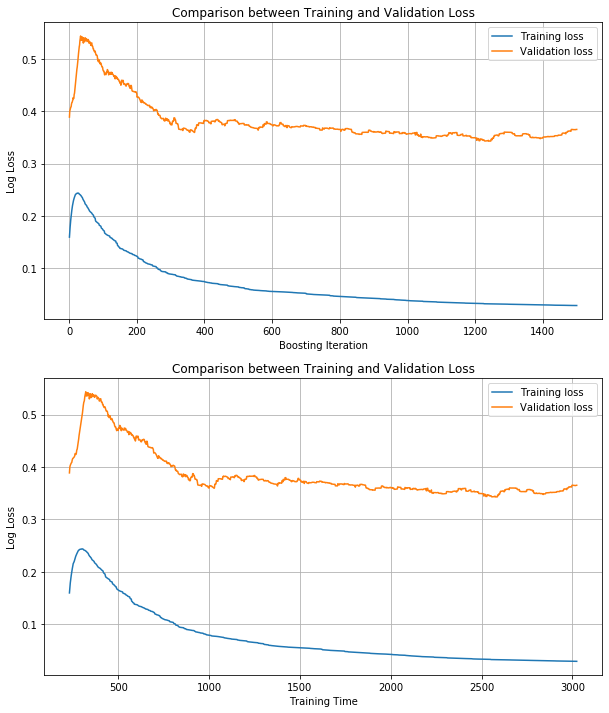

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt


fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].plot(size, train_loss, label="Training loss")
ax[0].plot(size, valid_loss, label="Validation loss")
ax[0].grid()
ax[0].set_xlabel("Boosting Iteration")
ax[0].set_ylabel("Log Loss")
ax[0].set_title("Comparison between Training and Validation Loss")
ax[0].legend();

ax[1].plot(ts, train_loss, label="Training loss")
ax[1].plot(ts, valid_loss, label="Validation loss")
ax[1].grid()
ax[1].set_xlabel("Training Time")
ax[1].set_ylabel("Log Loss")
ax[1].set_title("Comparison between Training and Validation Loss")
ax[1].legend();